## Final Project Submission

Please fill out:
* Student name: ELTON MWEMA
* Student pace: full time
* Scheduled project review date/time: Monday
* Instructor name: MARK TIBA
* Blog post URL:


# 1.BUSINESS UNDERSTANDING

## 1.1.Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.I am charged with exploring what types of films are currently doing the best at the box office. i will then translate those findings into actionable insights that the head of Microsoft's new movie studio will use to help decide what type of films to create.

## 1.2. Success Metric

This project will be considered a success if :

      1.The best selling and most produced films are identified
      
      2.The market gap is clearly identified
      
      3.Possible challenges likely to be encountered,e.g competitors are outlined

# 2.DATA UNDERSTANDING

## 2.1.Importing relevant libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!

#importing the relevant files thatt will be needed in this project.
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3

## 2.2.Reading the datasets
Here we look at the datasets and decide on the most relevant to our analysis

In [2]:
Movies = pd.read_csv('tmdb.movies.csv') #Reading the movies file for preview
Movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [3]:
#Importing the movies budget data frame using csv
Budget = pd.read_csv('bom.movie_gross.csv')

#calling the first 10 columns of the data frame
y = Budget.head(10)
y

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [4]:
#connecting to the IM data base through the sql command
conn = sqlite3.connect('im.db')
conn  

In [5]:
#calling the specific movie_basics table from the data base
df=pd.read_sql("""SELECT *
               FROM movie_basics;
               """,conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


#  2.3 Exploring the datasets

We are describing these data frames to understand on which sets we can combine to work on

### 2.3.1 Movies dataset

In [6]:
#Dropping the unnamed column as it displays indices which already exist by default

Movies = Movies.drop(['Unnamed: 0'],axis = 1)
Movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
#exploring column information on the dataframe

Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [8]:
#Viewing the measures of the Movies dataset

Movies.describe().T

,count,mean,std,min,25%,50%,75%,max
id,26517.0,295050.153260,153661.615648,27.0,157851.0,309581.000,419542.000,608444.000
popularity,26517.0,3.130912,4.355229,0.6,0.6,1.374,3.694,80.773
vote_average,26517.0,5.991281,1.852946,0.0,5.0,6.000,7.000,10.000
vote_count,26517.0,194.224837,960.961095,1.0,2.0,5.000,28.000,22186.000


### 2.3.2 Budget dataset

In [9]:
#We call the general view of the data frame
Budget

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [10]:
#We seek the general information of this dataset
Budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### 2.3.2.1 Tidying

we are tidying the budget data set as we notice null values and odd data types that could affect our analysis

In [11]:
#Checking the number of null values per column
Budget.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [12]:
#We drop all the null value columns in our data frame as the number is insignificant to our analysis

Budget = Budget.dropna()

In [13]:
#Checking the state of out dataset to see if its tidy

Budget.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [14]:
#Describing the clean data set
Budget.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_gross,2007.0,4.701984e+07,8.162689e+07,400.0,670000.0,16700000.0,56050000.0,936700000.0
year,2007.0,2.013506e+03,2.597997e+00,2010.0,2011.0,2013.0,2016.0,2018.0


# 3. DATA PREPARATION

After having the relevant information about the Data sets,i have decided to use two of them by merging.
They are the movies dataset and the Budget dataset as the contain all relevant questions

## 3.1 Selecting and Merging

We merge the two dataset that have been decided on

In [15]:
#The merge() function is used and the resultant dataset is larger and more relevant

data_set = Movies.merge(Budget ,how = 'inner',on = 'title')
data_set.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


In [16]:
#We check on the general outlook of our data 
data_set.tail()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
1696,"[12, 80, 10751, 35]",425148,en,Show Dogs,7.904,2018-05-18,Show Dogs,5.9,92,Global Road,17900000.0,21300000,2018
1697,"[35, 10749, 18, 9648]",522921,zh,超时空同居,6.840,2018-05-17,How Long Will I Love U,7.4,11,WGUSA,747000.0,82100000,2018
1698,"[12, 35, 14]",497984,zh,捉妖记2,6.637,2018-02-14,Monster Hunt 2,6.3,14,LGF,706000.0,361000000,2018
1699,"[18, 10749]",446132,fr,Gauguin: Voyage de Tahiti,5.553,2018-07-11,Gauguin: Voyage to Tahiti,5.6,48,Cohen,200000.0,3100000,2018
1700,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000,2018


## 3.2 Data cleaning

### 3.2.1 Uniformity

In [17]:
# General information of the dataset
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 1700
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          1701 non-null   object 
 1   id                 1701 non-null   int64  
 2   original_language  1701 non-null   object 
 3   original_title     1701 non-null   object 
 4   popularity         1701 non-null   float64
 5   release_date       1701 non-null   object 
 6   title              1701 non-null   object 
 7   vote_average       1701 non-null   float64
 8   vote_count         1701 non-null   int64  
 9   studio             1701 non-null   object 
 10  domestic_gross     1701 non-null   float64
 11  foreign_gross      1701 non-null   object 
 12  year               1701 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 186.0+ KB


### 3.2.2 Completeness

In [18]:
#Checking for null values,if all ==0,out set is complete.
data_set.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

### 3.2.3 Consistency

In [19]:
#We use the duplicated method to check the consistency of our data
data_set.duplicated().sum()

125

In [20]:
#We drop the duplicated columns
data_set = data_set.drop_duplicates()


In [21]:
#We confirm that we have dropped all duplicated rows and the result should be zero
data_set.duplicated().sum()

0

### 3.2.4 Validity

In [22]:
#We drop irrelevant columns
data_set = data_set.drop('genre_ids', axis = 1)
data_set = data_set.drop('original_title', axis = 1)
data_set

,id,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,27205,en,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,20352,en,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...
1696,425148,en,7.904,2018-05-18,Show Dogs,5.9,92,Global Road,17900000.0,21300000,2018
1697,522921,zh,6.840,2018-05-17,How Long Will I Love U,7.4,11,WGUSA,747000.0,82100000,2018
1698,497984,zh,6.637,2018-02-14,Monster Hunt 2,6.3,14,LGF,706000.0,361000000,2018
1699,446132,fr,5.553,2018-07-11,Gauguin: Voyage to Tahiti,5.6,48,Cohen,200000.0,3100000,2018


# 4. DATA ANALYSIS

Here we make usefullness of ur cleaned data set through visual insights and other descriptive sttistics

In [23]:
#Viewing the dataset overal information
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 0 to 1700
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1576 non-null   int64  
 1   original_language  1576 non-null   object 
 2   popularity         1576 non-null   float64
 3   release_date       1576 non-null   object 
 4   title              1576 non-null   object 
 5   vote_average       1576 non-null   float64
 6   vote_count         1576 non-null   int64  
 7   studio             1576 non-null   object 
 8   domestic_gross     1576 non-null   float64
 9   foreign_gross      1576 non-null   object 
 10  year               1576 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 147.8+ KB


In [24]:
#We are getting the count of the movie languages most produced by the studios
x = data_set['original_language'].unique()
x = data_set['original_language'].value_counts()
x

en    1360
fr      57
zh      26
es      20
hi      19
ja      14
ko      13
de      10
ru       7
da       6
cn       6
no       5
pt       5
it       5
sv       4
th       4
nl       3
ro       2
el       2
xx       1
pl       1
fi       1
he       1
fa       1
te       1
vi       1
hu       1
Name: original_language, dtype: int64

#### Having realized that english movies are the most produced,we move to filter our data to explore more about the english language movies with an average vote above 7.0


In [25]:
df = data_set[(data_set['vote_average'] >7.0) & (data_set['original_language'] == 'en')]
df

,id,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
2,27205,en,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,10193,en,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,20352,en,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010
7,38757,en,21.511,2010-11-24,Tangled,7.5,6407,BV,200800000.0,391000000,2010
...,...,...,...,...,...,...,...,...,...,...,...
1671,465914,en,13.579,2018-12-14,If Beale Street Could Talk,7.2,388,Annapurna,14900000.0,5700000,2018
1677,340613,en,12.374,2018-08-17,The Wife,7.2,441,SPC,9600000.0,8600000,2018
1678,399366,en,12.293,2018-04-13,Marrowbone,7.1,480,Magn.,1400.0,12300000,2018
1681,476968,en,12.005,2018-03-28,"Paul, Apostle of Christ",7.1,98,Affirm,17600000.0,5500000,2018


#### In the cell below, we will determine the the possible top competitors if we are to remain relevant in the business and make profits,for an actionable plan

In [26]:
#Here we check using the  value counts method,top ten studios productionwise
top_10_studios = list(df['studio'].value_counts().index[0:10])
top_10_studios

['BV', 'WB', 'Fox', 'Par.', 'Wein.', 'Focus', 'Uni.', 'LGF', 'FoxS', 'WB (NL)']

<AxesSubplot:xlabel='studio'>

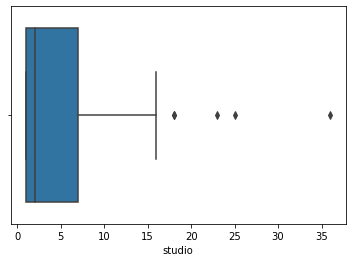

In [27]:
#We plot a boxplot to show the distribution of our production studios
sns.boxplot(x = df['studio'].value_counts())


#### Here  above, the boxplot outlines values as outliers but it is simply a visualization of how dominant a few studios are in the market.This could indicate lack of a worthy competitor hence a market gap

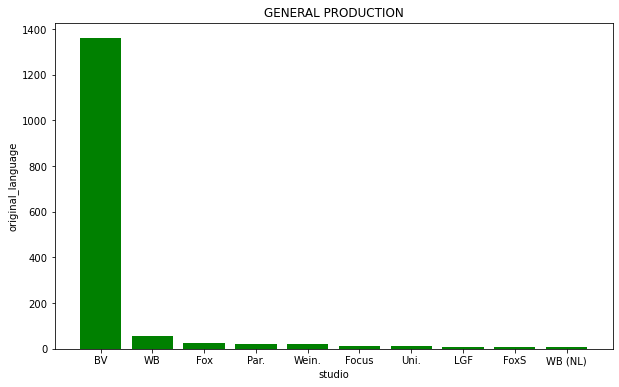

In [28]:
#We want to use a bar graph to check on the general production of englisg movies without considering other factors like the 
#popularity of the produced movies

Studios_figure, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_studios, data_set['original_language'].value_counts()[0:10],  color = 'green')

ax.set_title('GENERAL PRODUCTION')
ax.set_ylabel('original_language')
ax.set_xlabel('studio')
plt.show()

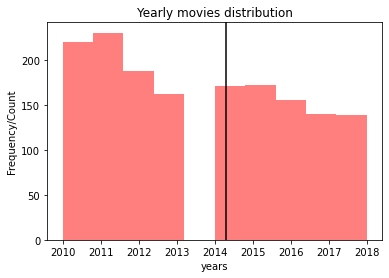

In [29]:
#Histogram showing the movie production rate between 2010 and 2018
ax = data_set['year'].plot.hist(color='red', alpha=0.5)

ax.set_title('Yearly movies distribution')

ax.set_ylabel('Frequency/Count')
ax.set_xlabel('years')

plt.axvline(x = df['year'].mean(), color = 'black', label = 'average popularity');

In [30]:
#We pick a sample random data from the larger data frame to have a general outlook
df1 = df.sample(n = 10)
df1

,id,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
1218,228203,en,8.197,2015-02-20,"McFarland, USA",7.3,358,BV,44500000.0,1200000,2015
1103,281957,en,19.410,2015-12-25,The Revenant,7.4,11064,Fox,183600000.0,349300000,2015
960,227306,en,12.354,2014-12-25,Unbroken,7.4,2240,Uni.,115600000.0,47800000,2014
33,23168,en,13.476,2010-09-17,The Town,7.1,2386,WB,92200000.0,61800000,2010
1011,239571,en,8.622,2014-10-17,The Best of Me,7.3,1512,Rela.,26800000.0,9200000,2014
1662,458423,en,15.720,2018-07-20,Mamma Mia! Here We Go Again,7.2,1722,Uni.,120600000.0,274400000,2018
183,44992,en,6.346,2010-03-19,Hubble 3D,7.1,54,WB,52400000.0,21500000,2010
975,85350,en,11.141,2014-07-11,Boyhood,7.5,3097,IFC,25400000.0,19100000,2014
1568,464593,en,8.266,2017-10-06,Earth: One Amazing Day,7.8,80,BBC,81300.0,11600000,2017
1076,140607,en,32.281,2015-12-18,Star Wars: The Force Awakens,7.4,12641,BV,936700000.0,"1,131.6",2015


In [31]:
#We sort the data in ascending order using the popularity column
df1 = df1.sort_values(by = 'popularity')
df1

,id,original_language,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
183,44992,en,6.346,2010-03-19,Hubble 3D,7.1,54,WB,52400000.0,21500000,2010
1218,228203,en,8.197,2015-02-20,"McFarland, USA",7.3,358,BV,44500000.0,1200000,2015
1568,464593,en,8.266,2017-10-06,Earth: One Amazing Day,7.8,80,BBC,81300.0,11600000,2017
1011,239571,en,8.622,2014-10-17,The Best of Me,7.3,1512,Rela.,26800000.0,9200000,2014
975,85350,en,11.141,2014-07-11,Boyhood,7.5,3097,IFC,25400000.0,19100000,2014
960,227306,en,12.354,2014-12-25,Unbroken,7.4,2240,Uni.,115600000.0,47800000,2014
33,23168,en,13.476,2010-09-17,The Town,7.1,2386,WB,92200000.0,61800000,2010
1662,458423,en,15.720,2018-07-20,Mamma Mia! Here We Go Again,7.2,1722,Uni.,120600000.0,274400000,2018
1103,281957,en,19.410,2015-12-25,The Revenant,7.4,11064,Fox,183600000.0,349300000,2015
1076,140607,en,32.281,2015-12-18,Star Wars: The Force Awakens,7.4,12641,BV,936700000.0,"1,131.6",2015


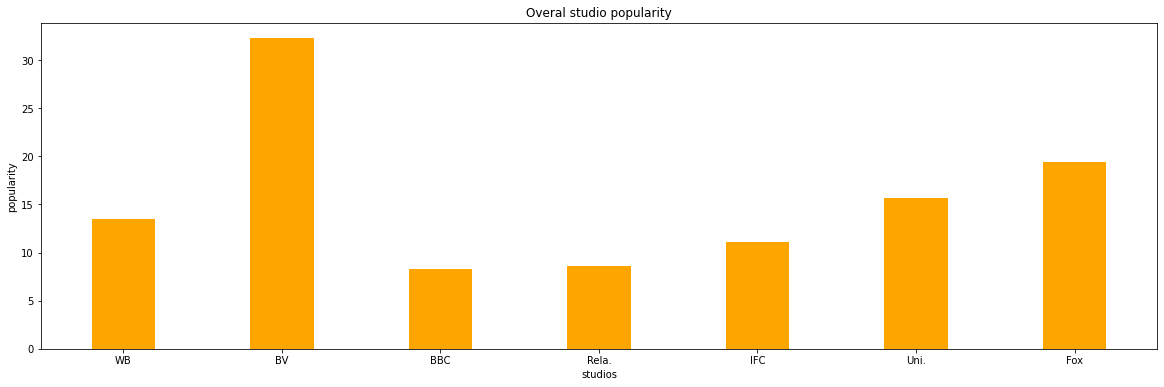

In [32]:
#We plot a bar graph to see on which studios we could benchmark in
plt.data = df1
x = df1['studio']
y = df1['popularity']

plt.figure(figsize = (20,6))

plt.bar(x, y, color ='orange',
        width = 0.4)
 
plt.xlabel("studios")
plt.ylabel("popularity")
plt.title("Overal studio popularity")
plt.show()

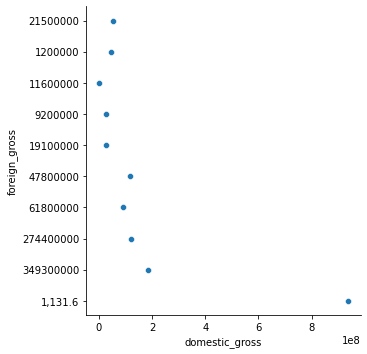

In [33]:
#A relation plot between the foreign gross and the domestic gross
sns.relplot(x = 'domestic_gross' ,y = 'foreign_gross', data = df1 ,)

<AxesSubplot:xlabel='year', ylabel='foreign_gross'>

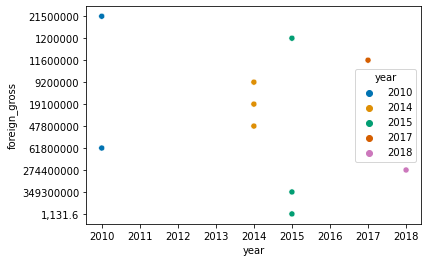

In [34]:
#scatteplot relating the foreign gross and the years progressively
sns.scatterplot(y='foreign_gross', x='year' ,
                 data=df1, 
                 palette="colorblind",
                 hue='year')

# 5. CONCLUSIONS

1.English movies have the highest ratings and popularity based on our datasets and visualizations

2.Movies production has declined over the years whereas potential consumers increase due to worldwide population increase possibly due to monopolistic competition hence some dtudios end up downscaling

3.B.V studio offers the greatest competition based on production of the most popular english movies

4.There is no correlation between what is earned at home and internationally and also intwenational income and the progressive years

# 6. RECOMMENDATIONS

1.That there is a market gap that needs to be filled on the production and microsoft studios could utilize that opportunity by massive venture as production has dropped over time.

2.The best benchmark studio is B.V studios as it is the greatest and the best based on the current market gap.

3.The gross average income of every studio depends on its efforts to produce popular movies with an average vote count of above 7.0 and no other factors based on our scatter plots hence the microsoft studio will have no option but to give the best for optimum income 